In [2]:
import numpy as np
import pandas as pd

In [3]:
movie_df = pd.read_csv('Movie_Id_Titles')

In [4]:
movie_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [13]:
user_df = pd.read_csv('u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])

In [14]:
user_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [16]:
movie=user_df.merge(movie_df,on='item_id')

In [21]:
movie.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [22]:
movie.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

In [28]:
movie.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

In [31]:
movie.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [35]:
rating = pd.DataFrame(movie.groupby('title')['rating'].mean())
rating['num_of_rating']=movie.groupby('title')['rating'].count()
rating

,rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

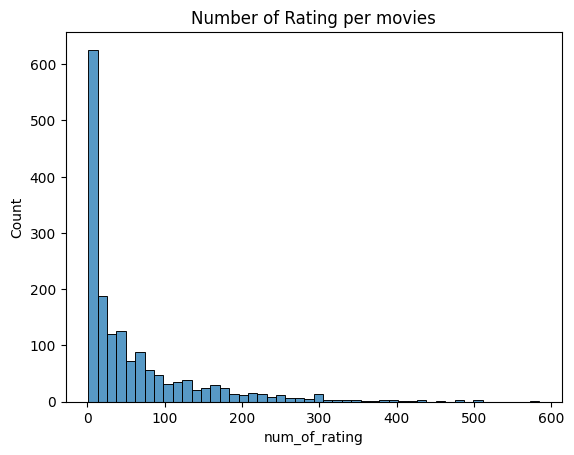

In [41]:
sns.histplot(rating['num_of_rating'])
plt.title('Number of Rating per movies')
plt.show()

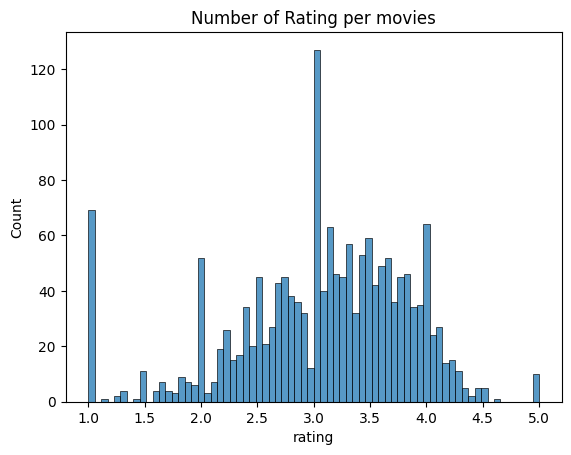

In [47]:
sns.histplot(rating['rating'],bins=70)
plt.title('Number of Rating per movies')
plt.show()

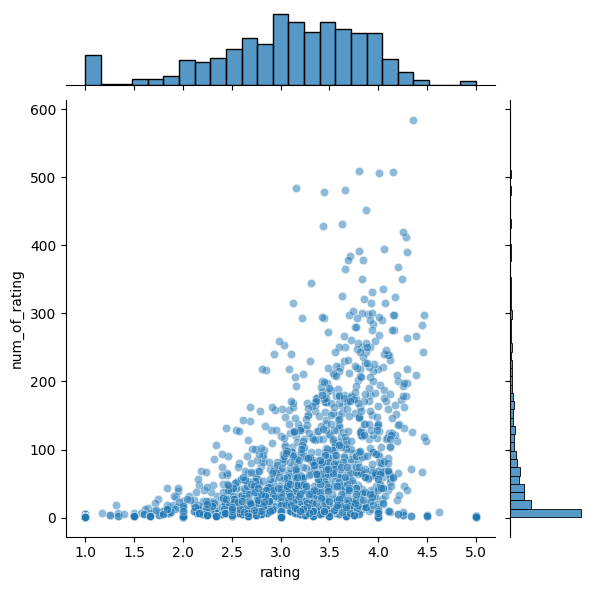

In [48]:
sns.jointplot(x='rating',y='num_of_rating',data=rating,alpha=0.5)

## Recommending Similar Movies


Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [57]:
moviemat = movie.pivot_table(index='user_id',columns='title',values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
rating.sort_values(by='num_of_rating',ascending=False).head(30)

,rating,num_of_rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [60]:
star_wars_similar = moviemat['Star Wars (1977)']
star_wars_similar

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [92]:
rating

,rating,num_of_rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [94]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(rating['num_of_rating'])
corr_liarliar[corr_liarliar['num_of_rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num_of_rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [101]:
star=moviemat.corrwith(star_wars_similar).sort_values(ascending=False).head()
star_df = pd.DataFrame(star,columns=['Correlation'])
star_df.join(rating['num_of_rating'])


,Correlation,num_of_rating
title,,
Star Wars (1977),1.0,584
Stripes (1981),1.0,5
Hollow Reed (1996),1.0,6
Man of the Year (1995),1.0,9
Cosi (1996),1.0,4


In [83]:
import warnings
warnings.filterwarnings('ignore')

In [102]:
def recommend_movies(movie):
    user = moviemat[movie]
    print('Recommende movies for {0}'.format(movie))
    similar=moviemat.corrwith(user).sort_values(ascending=False)[1:6]
    print(similar)


In [87]:
recommend_movies('Toy Story (1995)')

Recommende movies for Toy Story (1995)
title
Albino Alligator (1996)                    1.0
Across the Sea of Time (1995)              1.0
Wooden Man's Bride, The (Wu Kui) (1994)    1.0
Phantoms (1998)                            1.0
Newton Boys, The (1998)                    1.0
dtype: float64


In [112]:
import pandas as pd

def find_similar_movies(movie_name, moviemat, rating, min_ratings=100):
    # Get user ratings for the specified movie
    movie_user_ratings = moviemat[movie_name]
    
    # Calculate the correlation of the specified movie with all others
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    # Create a DataFrame for the correlations
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    
    # Drop NaN values
    corr_movie.dropna(inplace=True)
    
    # Join with the number of ratings
    corr_movie = corr_movie.join(rating['num_of_rating'])
    
    # Filter by the minimum number of ratings and sort by correlation
    result = corr_movie[corr_movie['num_of_rating'] > min_ratings].sort_values('Correlation', ascending=False)[1:6]

    print('Recommende movies for {0}'.format(movie_name))
    
    return result


In [115]:
# Assuming moviemat and ratings are already defined DataFrames
similar_movies = find_similar_movies('Batman Forever (1995)', moviemat, rating)
print(similar_movies)

Recommende movies for Batman Forever (1995)
                            Correlation  num_of_rating
title                                                 
Down Periscope (1996)          0.624417            101
Jungle2Jungle (1997)           0.611052            132
As Good As It Gets (1997)      0.587782            112
Net, The (1995)                0.568909            120
Alien: Resurrection (1997)     0.568416            124
